# Exercício: K-means
- Vamos utilizar o K-means no dataset abaixo:
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits
    - É um dataset de dígitos escritos a mão, onde cada registro é uma imagem 8x8 de um dígito 

In [1]:
# Importando o dataset
from sklearn.datasets import load_digits
digits = load_digits()

<Figure size 640x480 with 0 Axes>

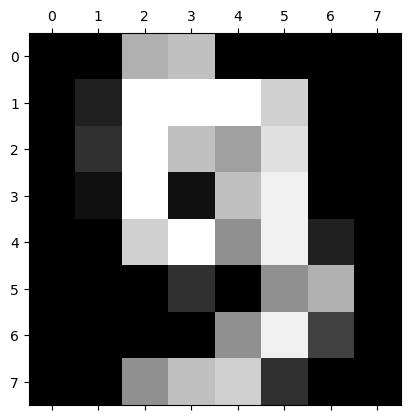

In [2]:
# Visualizando um dígito
import matplotlib.pyplot as plt
plt.gray();
plt.matshow(digits.images[9]);

In [3]:
# Transformando em um DataFrame
import pandas as pd
digitos = pd.DataFrame(digits.data,columns=digits.feature_names)
digitos['target'] = digits.target

In [4]:
digitos.head(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2


- **Utilizando o K-means**
    - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [5]:
# Importando o KMeans
from sklearn.cluster import KMeans

In [6]:
# Selecionando o X para fazer o fit dos dados
X = digitos.drop('target',axis=1)

In [7]:
# Utilizando o algoritmo
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [66]:
# Podemos percorrer a lista de valores de K
valores_k = []
dispersao = []

for i in range(1,50):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    valores_k.append(i)
    dispersao.append(kmeans.inertia_)

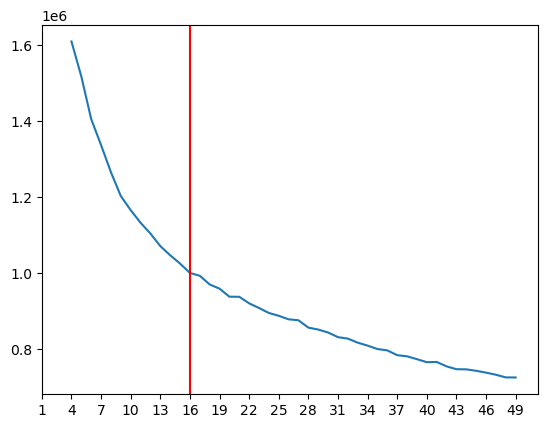

In [70]:
# Visualizando o gráfico de dispersão x K
import matplotlib.pyplot as plt
import numpy as np

fig,ax = plt.subplots()

ax.plot(valores_k[3:],dispersao[3:])
ax.axvline(x=16,color='r')

ax.set(xticks=np.arange(1, 50,3))

plt.show()

<a id='valores_K'></a>
- **Podemos começar analisando com k = 9**

In [71]:
# Considerando novamente o dataframe digitos
digitos = pd.DataFrame(digits.data,columns=digits.feature_names)
digitos['target'] = digits.target

In [72]:
# Escolhendo o valor de k
kmeans = KMeans(n_clusters=16, random_state=0).fit(X)

In [73]:
# Verificando quais foram os labels determinados pelo k-means
kmeans.labels_

array([ 3,  2, 12, ..., 12, 15, 12], dtype=int32)

In [74]:
# Contando a quantidade de valores
np.unique(kmeans.labels_,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=int32),
 array([ 86, 151, 117, 178,  81, 100,  27, 177, 103,  63,  90, 108, 158,
         88, 103, 167]))

In [75]:
# Podemos usar a lista abaixo e criar uma função capaz de transformar cada grupo em uma letra
def numero_letra(label):
    letras = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T']
    return letras[label]

In [76]:
# Criando uma coluna com os labels dados pelo K-means
digitos['labels'] = kmeans.labels_
digitos['grupos'] = digitos.labels.apply(numero_letra)
digitos.head(5)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target,labels,grupos
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,3,D
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,2,C
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2,12,M
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3,1,B
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,13,N


In [77]:
# Podemos selecionar apenas a base com o target e os labels
base = digitos[['target','grupos']].value_counts().reset_index()
base.columns = ['target','grupos','count']
base.head(3)

,target,grupos,count
0,0,D,177
1,6,H,175
2,3,B,149


- **Podemos usar uma `pivot_table` para visualizar melhor**
    - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

In [78]:
# Pivotando essa tabela
tabela = base.pivot_table(index='target',columns='grupos',values='count',fill_value=0).reset_index()

In [79]:
# Melhorando a visualização
tabela = tabela.drop('target',axis=1)

In [80]:
# Exibindo a tabela resultante
tabela

grupos,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,0,0,0,177,0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,100,0,54,0,27,0,0,0,0,0,0,0,0,0
2,0,0,1,1,2,0,0,0,0,61,0,2,9,0,101,0
3,2,149,0,0,0,2,0,0,2,2,0,5,8,0,0,13
4,0,0,0,0,0,4,0,0,0,0,88,2,0,87,0,0
5,75,0,0,0,0,0,0,1,96,0,1,0,0,0,0,9
6,0,0,2,0,0,0,0,175,2,0,0,0,1,1,0,0
7,0,0,0,0,0,93,0,0,0,0,0,86,0,0,0,0
8,6,0,14,0,6,0,0,1,1,0,0,2,138,0,2,4
9,2,2,0,0,19,1,0,0,2,0,0,11,2,0,0,141


In [81]:
# Podemos calcular o % de targets do mesmo tipo existem em cada grupo
tabela.max(axis=0)/tabela.sum(axis=0)

grupos
A    0.872093
B    0.986755
C    0.854701
D    0.994382
E    0.666667
F    0.930000
G    1.000000
H    0.988701
I    0.932039
J    0.968254
K    0.977778
L    0.796296
M    0.873418
N    0.988636
O    0.980583
P    0.844311
dtype: float64

- 1 e 8 foram os dígitos mais classificados de forma errada, vamos visualizar esses dígitos

In [82]:
# Filtrando os digitos 8
digitos[(digitos.target == 8)&(digitos.grupos=='H')].index

Int64Index([784], dtype='int64')

<Figure size 640x480 with 0 Axes>

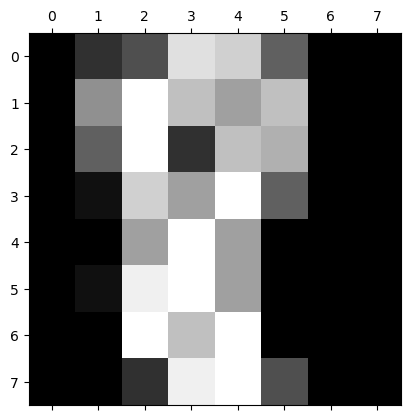

In [83]:
# Podemos visualizar esse número
plt.gray();
plt.matshow(digits.images[76]);

In [84]:
# Selecionando todas as linhas do grupo H
linhas = digitos[(digitos.grupos=='H')].index

In [85]:
# Selecionando uma linha aleatório nesse grupo
aleatorio = linhas[np.random.randint(len(linhas))]

In [86]:
# Buscando o rótulo (classificação correta) desse valor
digitos.iloc[aleatorio][['target','grupos']]

target    6
grupos    H
Name: 1005, dtype: object

<Figure size 640x480 with 0 Axes>

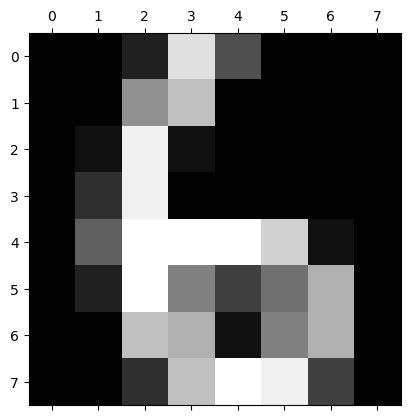

In [87]:
# Visualizando o dígito escrito a mão
plt.gray();
plt.matshow(digits.images[aleatorio]);

- Para melhor visualizar essa tabela de targets x grupos, também podemos utilizar o heatmap
    - https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [88]:
# Importando o seaborn
import seaborn as sns

<AxesSubplot:xlabel='grupos'>

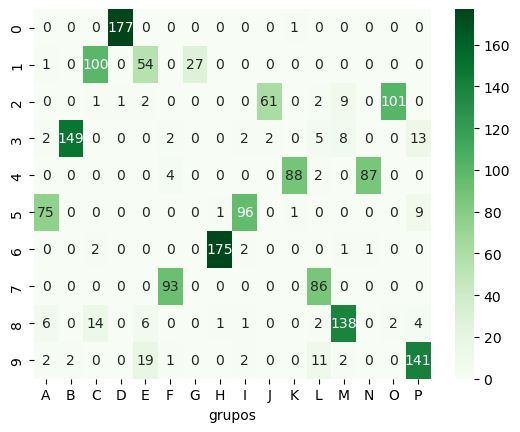

In [89]:
# Visualizando a tabela
sns.heatmap(tabela,annot=True,cmap='Greens',fmt='.0f')

- **Podemos então avaliar esse modelo**
    - Para isso, vamos precisar determinar qual seria a classe que atribuiríamos para cada um dos grupos
        - Podemos atribuir a classe mais presente naquele grupo

In [91]:
# Determinando a classe mais presente em cada grupo
valores_digitos = tabela.idxmax().reset_index()
valores_digitos.columns = ['grupos','y_pred']
valores_digitos.head(3)

,grupos,y_pred
0,A,5
1,B,3
2,C,1


In [92]:
# Unindo esse DataFrame gerado com o "digitos"
digitos = pd.merge(
    digitos,
    valores_digitos,
    how='left',
    on='grupos')

In [93]:
# Visualizando o resultado
digitos.head(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target,labels,grupos,y_pred
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,6.0,13.0,10.0,0.0,0.0,0.0,0,3,D,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,11.0,16.0,10.0,0.0,0.0,1,2,C,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,3.0,11.0,16.0,9.0,0.0,2,12,M,8


In [94]:
# Importando o metrics do sklearn
from sklearn import metrics

In [95]:
# Gerando a matriz de confusão
metrics.confusion_matrix(digitos.target,digitos.y_pred)

array([[177,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0, 181,   0,   0,   0,   1,   0,   0,   0,   0],
       [  1,   3, 162,   0,   0,   0,   0,   2,   9,   0],
       [  0,   0,   2, 149,   0,   4,   0,   7,   8,  13],
       [  0,   0,   0,   0, 175,   0,   0,   6,   0,   0],
       [  0,   0,   0,   0,   1, 171,   1,   0,   0,   9],
       [  0,   2,   0,   0,   1,   2, 175,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 179,   0,   0],
       [  0,  20,   2,   0,   0,   7,   1,   2, 138,   4],
       [  0,  19,   0,   2,   0,   4,   0,  12,   2, 141]])

In [96]:
# Analisando a acurácia
metrics.accuracy_score(digitos.target,digitos.y_pred)

0.9170840289371174

In [97]:
# A precisão
metrics.precision_score(digitos.target,digitos.y_pred,average='macro')

0.9216399607252409

In [98]:
# E o recall
metrics.recall_score(digitos.target,digitos.y_pred,average='macro')

0.9168048283166963

- **Sabemos que temos 10 números, e se [voltarmos](#valores_K) e usarmos esse valor para K?**

- **E se [voltarmos](#valores_K) e tentarmos um K muito maior?**